# Proyecto: Predicción de edad de abulones (Abalone dataset)
**Objetivo:** Realizar un EDA completo (11 pasos) y construir un modelo predictivo para la edad (`Age = Rings + 1.5`) usando el Abalone Dataset.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

## Paso 2 — Importar datos
Cargamos el dataset directamente desde la URL: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data  
Asignamos nombres de columnas y creamos una copia de trabajo (para preservar el dataset original).  
Además crearemos la variable `Age = Rings + 1.5` y guardaremos una copia en Drive.


In [34]:
# Cargar el dataset (ajustar la URL según su grupo)
datos = pd.read_csv(' https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data ')
# Crear una copia de trabajo
datos_trabajo = datos.copy()
# Visualizar las primeras filas
print(datos_trabajo.head())
print(f"\nDimensiones del dataset: {datos_trabajo.shape}")

   M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8

Dimensiones del dataset: (4176, 9)


In [35]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
col_names = ["Sex","Length","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"]

df = pd.read_csv(url, header=None, names=col_names)
df_original = df.copy()  # preservamos original

# Crear variable Age = Rings + 1.5 (justificación: edad aproximada en años; Rings ~ número de anillos, +1.5 para ajustar estimación media)
df['Age'] = df['Rings'] + 1.5

# Guardar copia en Drive
csv_path = os.path.join(project_dir, 'abalone.csv')
df.to_csv(csv_path, index=False)
print("Datos cargados — shape:", df.shape)
df.head(10)

Datos cargados — shape: (4177, 10)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,20.5


## Paso 3 — Revisar datos NAN
Verificaremos tipos, estadísticos, valores faltantes y construiremos un pequeño reporte con columnas, tipos, n_missing, n_unique y %missing.


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
 9   Age            4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB

=== Descriptivos (numéricos) ===


,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
WholeWeight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
ShuckedWeight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
VisceraWeight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
ShellWeight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000
Age,4177.0,11.433684,3.224169,2.5000,9.5000,10.5000,12.500,30.5000


,column,n_missing,dtype,n_unique,pct_missing
0,Sex,0,object,3,0.0
1,Length,0,float64,134,0.0
2,Diameter,0,float64,111,0.0
3,Height,0,float64,51,0.0
4,WholeWeight,0,float64,2429,0.0
5,ShuckedWeight,0,float64,1515,0.0
6,VisceraWeight,0,float64,880,0.0
7,ShellWeight,0,float64,926,0.0
8,Rings,0,int64,28,0.0
9,Age,0,float64,28,0.0


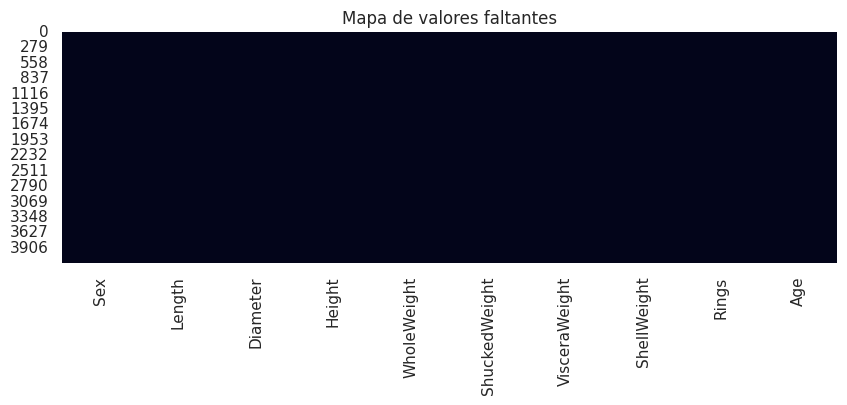

In [36]:
print("=== Info ===")
df.info()
print("\n=== Descriptivos (numéricos) ===")
display(df.describe().T)

# Valores faltantes
missing = df.isna().sum().reset_index()
missing.columns = ['column','n_missing']
missing['dtype'] = df.dtypes.values
missing['n_unique'] = [df[col].nunique() for col in df.columns]
missing['pct_missing'] = missing['n_missing'] / len(df) * 100
display(missing)

# Heatmap de missing
plt.figure(figsize=(10,3))
sns.heatmap(df.isna(), cbar=False)
plt.title('Mapa de valores faltantes')
plt.show()

## Paso 4 — Limpiar datos
Tareas:
- Normalizar `Sex` (strip, upper)
- Detectar y eliminar duplicados
- Tratar valores faltantes (si existen)
- Detectar outliers mediante IQR y mostrar ejemplos
- Aplicar transformaciones justificadas (p.ej. log en pesos si hay asimetría)


In [37]:
df['Sex'] = df['Sex'].astype(str).str.strip().str.upper()
print("Valores únicos en Sex:", df['Sex'].unique())

# Duplicados
n_dup = df.duplicated().sum()
print(f"Duplicados encontrados: {n_dup}")
if n_dup > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados. Nuevo shape:", df.shape)

# No vemos valores NaN (revisar)
print("Missing tras limpieza:", df.isna().sum().sum())

# Detectar outliers por IQR para variables numéricas (excluyendo Rings y Age por ahora si se desea)
num_cols = ["Length","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight"]
outlier_summary = []
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < low) | (df[col] > high)]
    outlier_summary.append((col, len(outliers), low, high))
    print(f"{col}: outliers={len(outliers)} (limits: {low:.4f}, {high:.4f})")
    if len(outliers)>0:
        display(outliers.sample(min(3, len(outliers))))

# Aplicar transformación log1p a pesos si la distribución está muy sesgada
for col in ["WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight"]:
    print(f"{col} skew before: {df[col].skew():.3f}")
    df[f'{col}_log1p'] = np.log1p(df[col])
    print(f"{col} skew after (log1p): {df[f'{col}_log1p'].skew():.3f}")

Valores únicos en Sex: ['M' 'F' 'I']
Duplicados encontrados: 0
Missing tras limpieza: 0
Length: outliers=49 (limits: 0.2025, 0.8625)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
3837,I,0.17,0.105,0.035,0.034,0.0120,0.0085,0.005,4,5.5
149,I,0.17,0.130,0.095,0.030,0.0130,0.0080,0.010,4,5.5
239,I,0.16,0.120,0.035,0.021,0.0075,0.0045,0.005,5,6.5


Diameter: outliers=59 (limits: 0.1550, 0.6750)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
719,I,0.15,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2,3.5
2115,I,0.18,0.130,0.045,0.0275,0.0125,0.0100,0.0090,3,4.5
2114,I,0.13,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4,5.5


Height: outliers=29 (limits: 0.0400, 0.2400)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
2172,I,0.215,0.150,0.030,0.0385,0.0115,0.0050,0.0100,5,6.5
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9,10.5
3190,I,0.200,0.145,0.025,0.0345,0.0110,0.0075,0.0100,5,6.5


WholeWeight: outliers=30 (limits: -0.6258, 2.2203)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
1761,M,0.750,0.595,0.205,2.2205,1.0830,0.4210,0.6300,12,13.5
3007,M,0.730,0.585,0.225,2.2305,1.2395,0.4220,0.5630,14,15.5
3599,M,0.735,0.555,0.220,2.3330,1.2395,0.3645,0.6195,12,13.5


ShuckedWeight: outliers=48 (limits: -0.2880, 0.9760)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
1051,F,0.735,0.600,0.220,2.555,1.1335,0.4400,0.6000,11,12.5
1199,F,0.720,0.580,0.195,2.103,1.0265,0.4800,0.5375,10,11.5
3082,F,0.755,0.575,0.200,2.073,1.0135,0.4655,0.4800,11,12.5


VisceraWeight: outliers=26 (limits: -0.1458, 0.4923)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
1422,M,0.72,0.575,0.215,2.1730,0.9515,0.5640,0.5365,12,13.5
1757,F,0.73,0.560,0.190,1.9425,0.7990,0.5195,0.5655,11,12.5
3427,M,0.74,0.605,0.200,2.4925,1.1455,0.5750,0.5235,13,14.5


ShellWeight: outliers=35 (limits: -0.1685, 0.6275)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
168,M,0.705,0.560,0.22,1.9810,0.8175,0.3085,0.760,14,15.5
891,M,0.730,0.595,0.23,2.8255,1.1465,0.4190,0.897,17,18.5
3188,M,0.720,0.575,0.23,2.2695,0.8835,0.3985,0.665,16,17.5


WholeWeight skew before: 0.531
WholeWeight skew after (log1p): -0.038
ShuckedWeight skew before: 0.719
ShuckedWeight skew after (log1p): 0.306
VisceraWeight skew before: 0.592
VisceraWeight skew after (log1p): 0.376
ShellWeight skew before: 0.621
ShellWeight skew after (log1p): 0.315


## Paso 5 — Visualizaciones
Generaremos las visualizaciones solicitadas para cada variable: countplot para Sex, hist + kde, boxplots, scatter plots relevantes y relaciones target vs features. Después de cada figura, se debe añadir una breve interpretación.


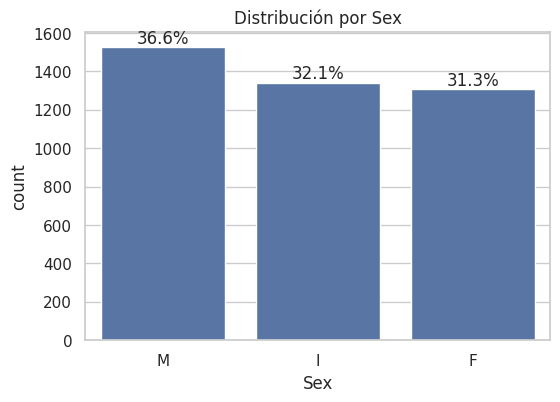

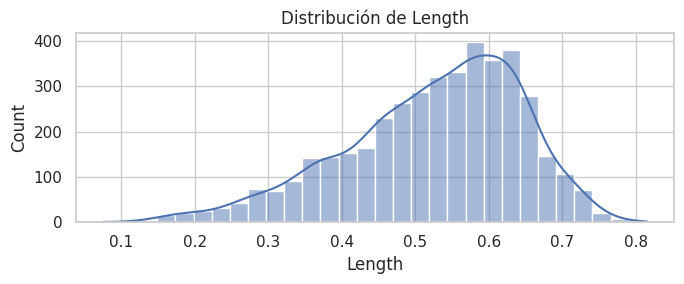

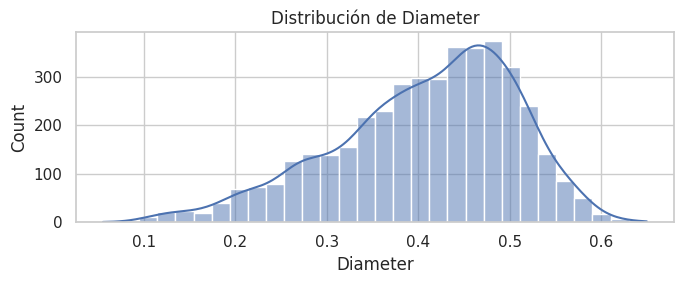

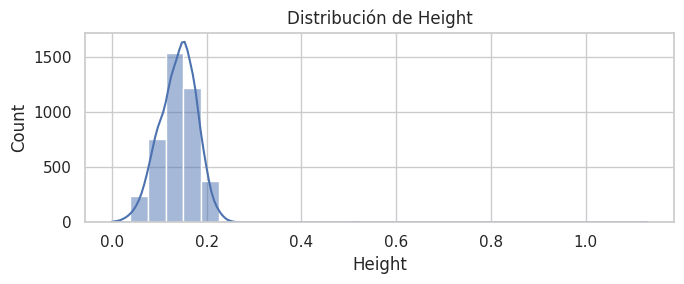

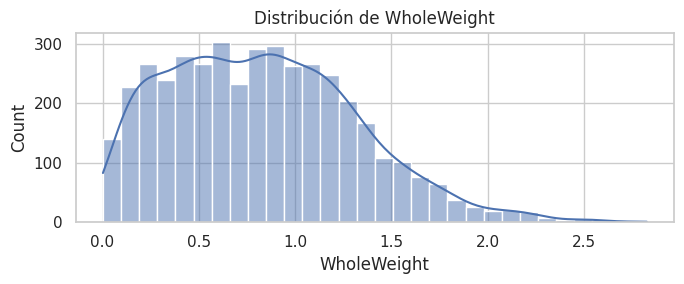

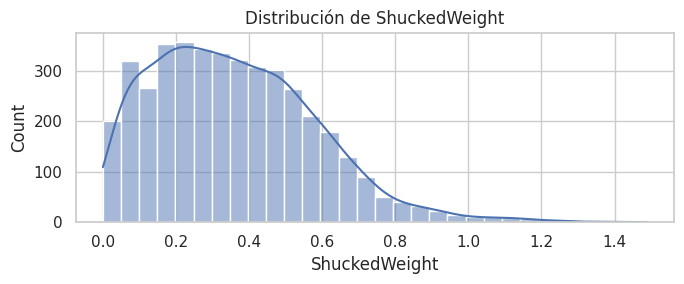

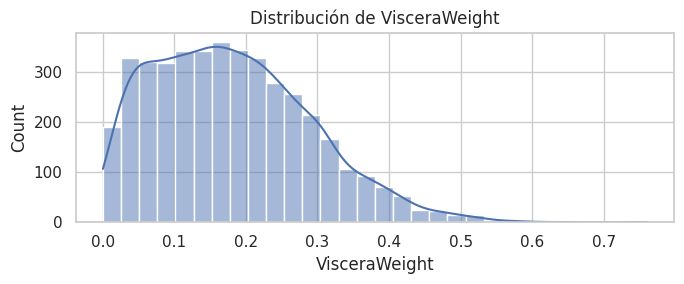

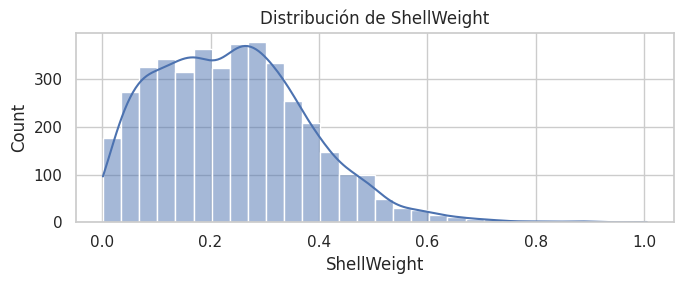

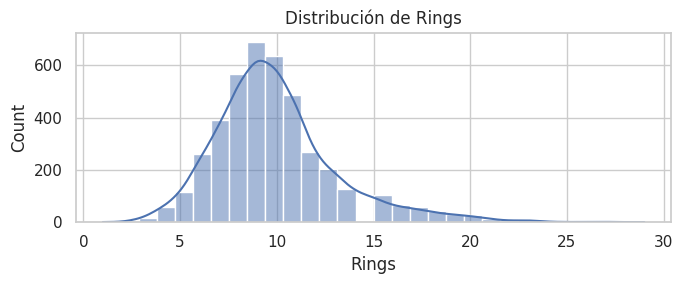

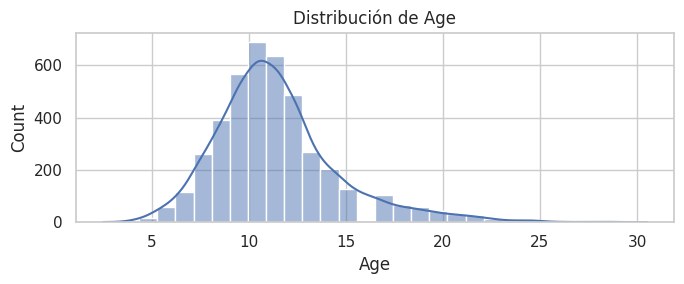

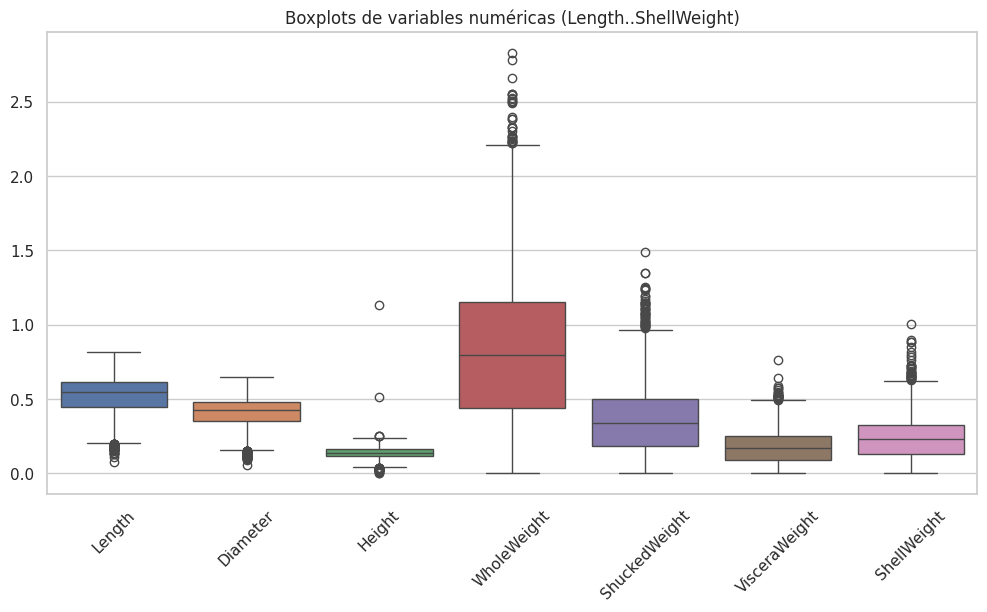

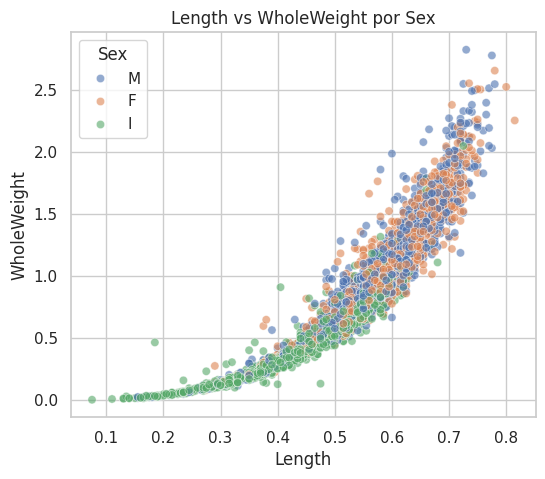

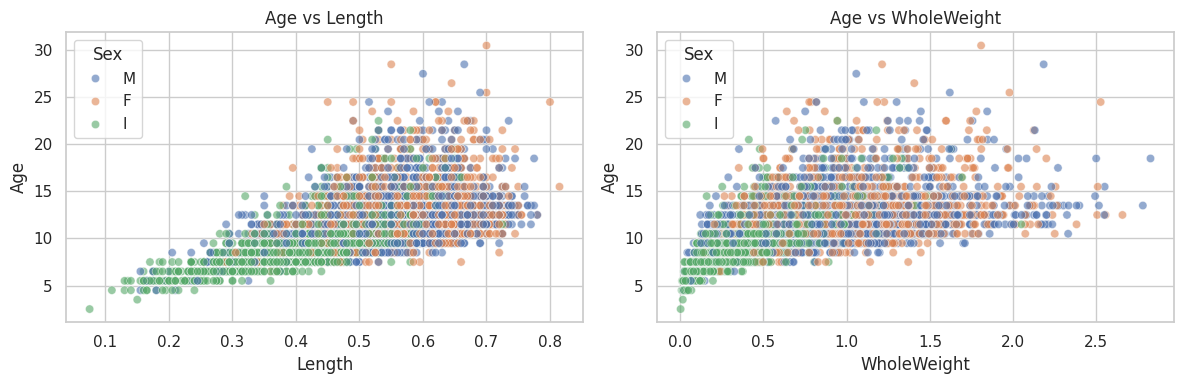

In [38]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Sex', order=df['Sex'].value_counts().index)
total = len(df)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='bottom')
plt.title('Distribución por Sex')
plt.show()

# Hist + KDE para variables continuas
for col in ["Length","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings","Age"]:
    plt.figure(figsize=(7,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots de variables numéricas (Length..ShellWeight)')
plt.xticks(rotation=45)
plt.show()

# Scatter: Length vs WholeWeight
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Length', y='WholeWeight', hue='Sex', alpha=0.6)
plt.title('Length vs WholeWeight por Sex')
plt.show()

# Relación Age vs Length y Age vs WholeWeight
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Length', y='Age', hue='Sex', alpha=0.6)
plt.title('Age vs Length')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='WholeWeight', y='Age', hue='Sex', alpha=0.6)
plt.title('Age vs WholeWeight')
plt.tight_layout()
plt.show()



**Interpretaciones rápidas (ejemplo)**  
- `Sex`: distribución por M, F, I; indicar si hay balance o no.  
- `Length` y `WholeWeight`: parece existir correlación positiva.  
- `Rings`/`Age`: revisar sesgo; si es muy sesgada, considerar transformaciones o robustez en métricas.  
(Escribir tu análisis después de observar las gráficas en el notebook.)


## Paso 6 — Conversión de variables a número
Se codificará `Sex` usando OneHotEncoder (prefiero One-Hot para que no haya orden implícito).
Todas las transformaciones se incluirán en un `ColumnTransformer` para garantizar reproducibilidad.


In [39]:
categorical_features = ['Sex']
numeric_features = ["Length","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight"]
# We also created log versions for weights; decide si usarlas (toggle)
numeric_with_logs = numeric_features + [f'{c}_log1p' for c in ["WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight"]]

# Transformer ejemplo: OneHotEncoder para Sex, StandardScaler para num (puedes cambiar a MinMaxScaler)
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler_std = StandardScaler()
column_transformer = ColumnTransformer([
    ('onehot', onehot, categorical_features),
    ('scaler', scaler_std, numeric_with_logs),
], remainder='drop', verbose_feature_names_out=False)

# Mostrar ejemplo de transformación (sin encajar completamente)
sample_X = df[categorical_features + numeric_with_logs].head()
display(sample_X)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,WholeWeight_log1p,ShuckedWeight_log1p,VisceraWeight_log1p,ShellWeight_log1p
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.414755,0.202533,0.096219,0.139762
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.203349,0.094856,0.047361,0.067659
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.517006,0.228330,0.132343,0.190620
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.416075,0.195156,0.107957,0.144100
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.186480,0.085719,0.038740,0.053541


## Paso 7 — Normalización
Compararemos `StandardScaler` vs `MinMaxScaler` y dejaremos la elección documentada. Importante: **no** escalamos la variable objetivo `Age`.



StandardScaler — mean: 0.0000, std: 1.0000, min: -1.7904, max: 2.7952


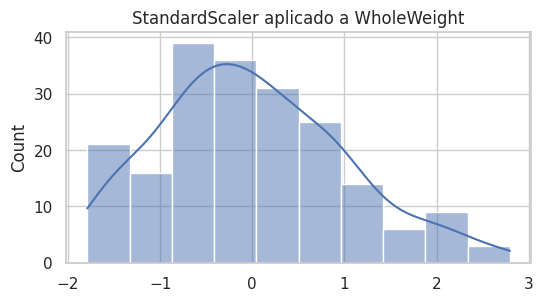


MinMaxScaler — mean: 0.3904, std: 0.2181, min: 0.0000, max: 1.0000


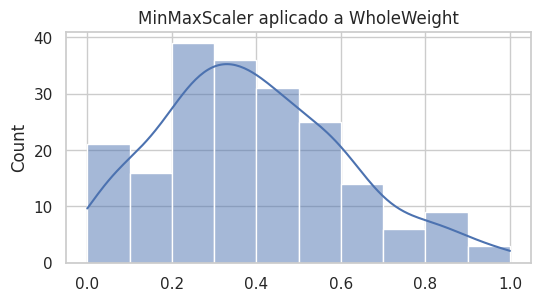

In [40]:
from sklearn.preprocessing import MinMaxScaler

scalers = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler()}
col_to_check = ['WholeWeight']
df_sample = df[col_to_check].dropna().sample(200, random_state=RANDOM_STATE)
for name, s in scalers.items():
    transformed = s.fit_transform(df_sample)
    print(f"\n{name} — mean: {transformed.mean():.4f}, std: {transformed.std():.4f}, min: {transformed.min():.4f}, max: {transformed.max():.4f}")
    plt.figure(figsize=(6,3))
    sns.histplot(transformed.flatten(), kde=True)
    plt.title(f'{name} aplicado a {col_to_check[0]}')
    plt.show()

## Paso 8 — Correlación
Calcularemos matriz de correlación Pearson y Spearman y visualizaremos heatmaps. Identificaremos variables con mayor correlación con `Age`.


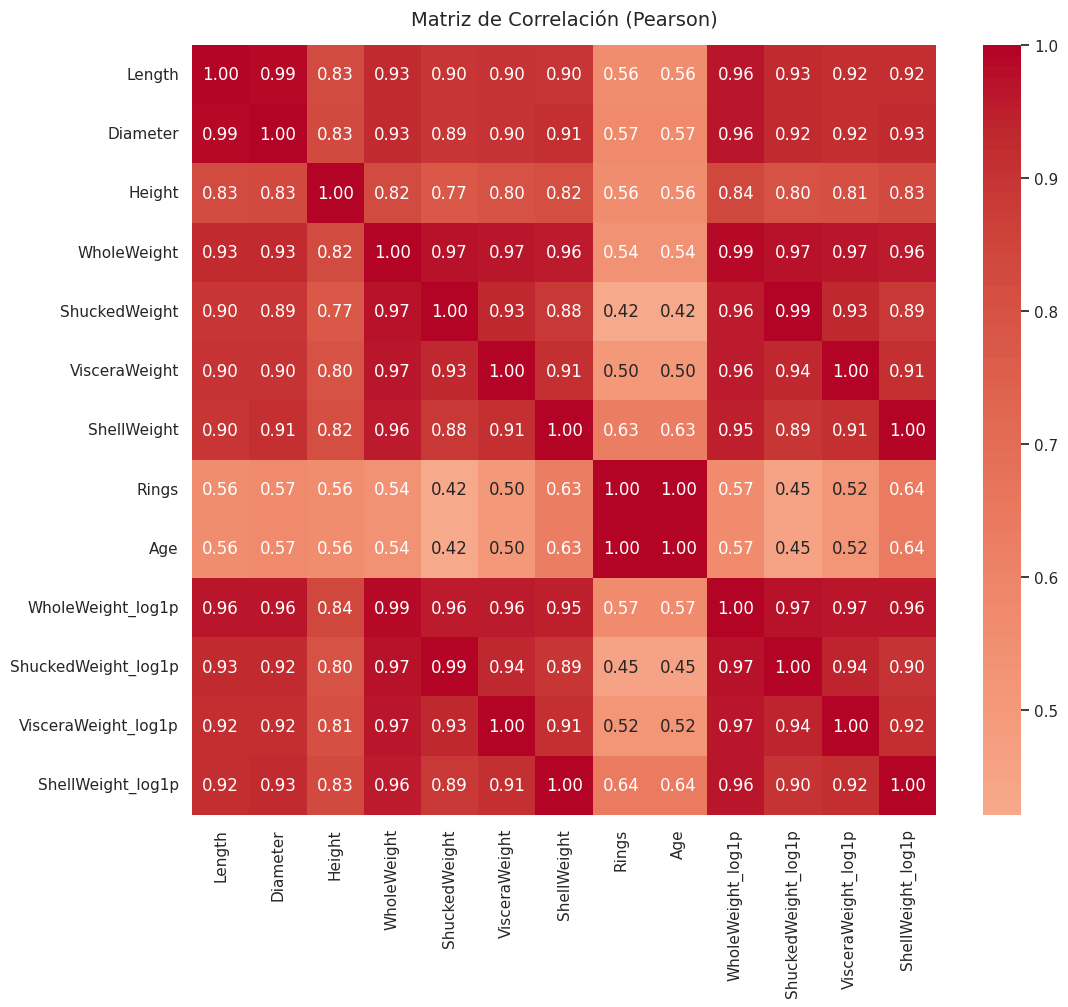

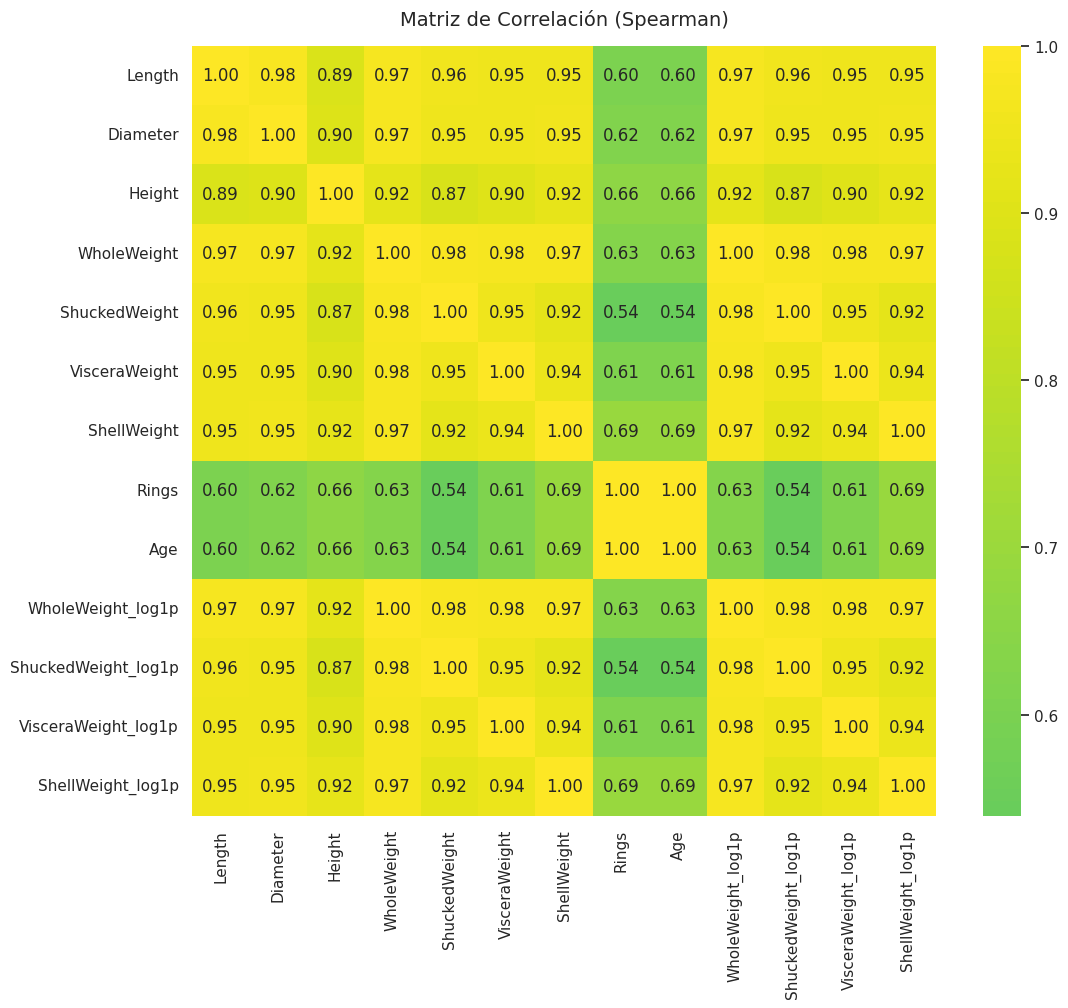

,Age
Age,1.000000
Rings,1.000000
ShellWeight_log1p,0.635717
ShellWeight,0.627574
Diameter,0.574660
WholeWeight_log1p,0.568168
Height,0.557467
Length,0.556720
WholeWeight,0.540390
VisceraWeight_log1p,0.516792



Variables con correlación positiva fuerte (> 0.5):
Age                    1.000000
Rings                  1.000000
ShellWeight_log1p      0.635717
ShellWeight            0.627574
Diameter               0.574660
WholeWeight_log1p      0.568168
Height                 0.557467
Length                 0.556720
WholeWeight            0.540390
VisceraWeight_log1p    0.516792
VisceraWeight          0.503819
Name: Age, dtype: float64

Variables con correlación negativa fuerte (< -0.3):
Series([], Name: Age, dtype: float64)

Interpretación automática:
Las variables con mayor correlación positiva con la edad son Age, Rings, ShellWeight_log1p. No se observaron correlaciones negativas significativas.


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Asegurar consistencia de los datos ---
df['Sex'] = df['Sex'].astype(str).str.strip().str.upper()

# Crear un dataframe auxiliar con codificación one-hot (sin modificar el original)
df_corr = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=False)

# Seleccionar solo columnas numéricas
num_df = df_corr.select_dtypes(include=[np.number])

# --- Calcular correlaciones ---
corr_pearson = num_df.corr(method='pearson')
corr_spearman = num_df.corr(method='spearman')

# --- Heatmap Pearson ---
plt.figure(figsize=(12,10))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (Pearson)', fontsize=14, pad=15)
plt.show()

# --- Heatmap Spearman ---
plt.figure(figsize=(12,10))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='viridis', center=0)
plt.title('Matriz de Correlación (Spearman)', fontsize=14, pad=15)
plt.show()

# --- Correlación con Age ---
corr_with_age = corr_pearson['Age'].sort_values(ascending=False)
display(corr_with_age)

# --- Identificar correlaciones fuertes ---
threshold_pos = 0.5
threshold_neg = -0.3
strong_pos = corr_with_age[corr_with_age > threshold_pos]
strong_neg = corr_with_age[corr_with_age < threshold_neg]

print("\nVariables con correlación positiva fuerte (> 0.5):")
print(strong_pos)

print("\nVariables con correlación negativa fuerte (< -0.3):")
print(strong_neg)

# --- Interpretación automática ---
def interpretar_correlacion(corr_series):
    """Genera interpretación textual a partir de la correlación con Age."""
    top_vars = corr_series.head(3).index.tolist()
    msg = f"Las variables con mayor correlación positiva con la edad son {', '.join(top_vars[:3])}. "
    if len(strong_neg) > 0:
        neg_vars = ', '.join(strong_neg.index.tolist())
        msg += f"Se observaron correlaciones negativas destacadas con {neg_vars}, "
        msg += "lo que sugiere una relación inversa con la edad."
    else:
        msg += "No se observaron correlaciones negativas significativas."
    return msg

print("\nInterpretación automática:")
print(interpretar_correlacion(corr_with_age))

## Paso 9 — Test de Normalidad

Objetivo: evaluar si las variables numéricas clave (Length, Diameter, Height, pesos, Rings, Age) siguen una distribución normal.
Procedimiento:
- Aplicar Shapiro-Wilk (válido para n ≤ 5000). Si n > 5000, se usa KS o sólo chequeos visuales (QQ-plot + hist).
- Reportar p-values y conclusiones (ALPHA = 0.05).
- Mostrar Q-Q plots para las variables con mayor desviación.

,variable,stat,p_value,conclusion
0,Length,0.9697,0.0,No normal
1,Diameter,0.9705,0.0,No normal
2,Height,0.8896,0.0,No normal
3,WholeWeight,0.9723,0.0,No normal
4,ShuckedWeight,0.9621,0.0,No normal
5,VisceraWeight,0.9681,0.0,No normal
6,ShellWeight,0.9704,0.0,No normal
7,Rings,0.9312,0.0,No normal
8,Age,0.9312,0.0,No normal


<Figure size 600x400 with 0 Axes>

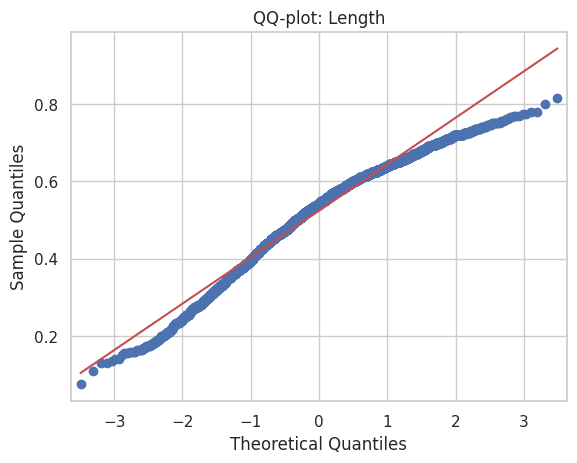

<Figure size 600x400 with 0 Axes>

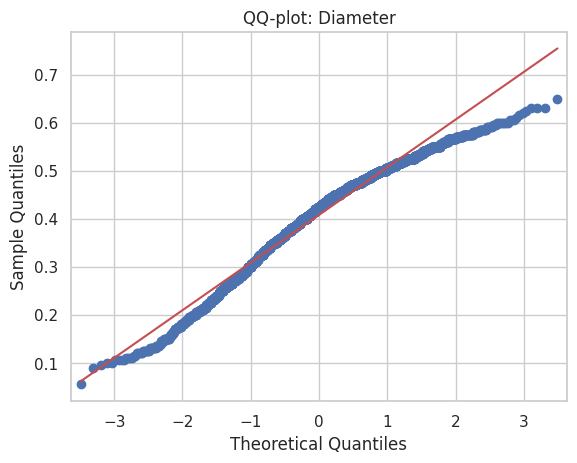

<Figure size 600x400 with 0 Axes>

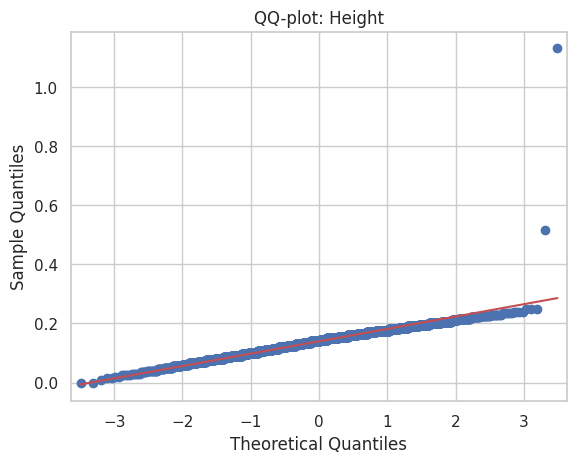

<Figure size 600x400 with 0 Axes>

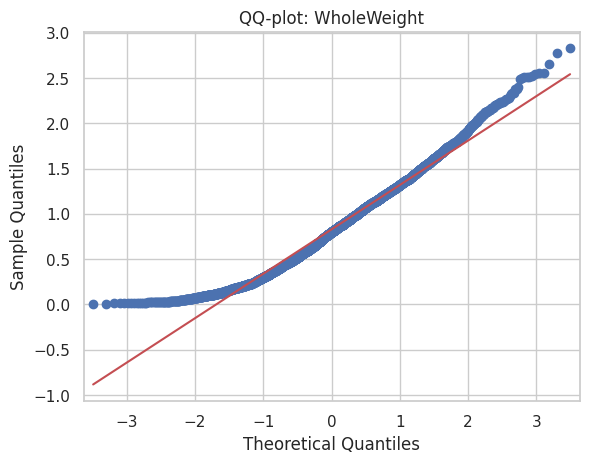

In [42]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, probplot

# Asegurar df y las columnas numéricas
assert 'df' in globals(), "No se encontró df en el entorno. Ejecuta las celdas previas de carga/EDA."

numeric_for_test = ["Length","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings","Age"]
alpha = 0.05
results = []

for col in numeric_for_test:
    data = df[col].dropna()
    if len(data) == 0:
        results.append((col, None, None, "sin datos"))
        continue
    if len(data) <= 5000:
        stat, p = shapiro(data)
        conclusion = 'Normal' if p > alpha else 'No normal'
        results.append((col, round(stat,4), round(p,6), conclusion))
    else:
        # fallback: KS test against normal with same mean/std (no es perfecto pero informativo)
        stat, p = kstest((data - data.mean()) / data.std(), 'norm')
        conclusion = 'Normal (KS)' if p > alpha else 'No normal (KS)'
        results.append((col, round(stat,4), round(p,6), conclusion))

res_df = pd.DataFrame(results, columns=['variable','stat','p_value','conclusion'])
display(res_df)

# QQ-plots para las 4 variables con p-value más pequeño (más desviadas)
bad_vars = res_df[res_df['conclusion'].str.contains('No')]['variable'].tolist()[:4]
import statsmodels.api as sm
for col in bad_vars:
    plt.figure(figsize=(6,4))
    sm.qqplot(df[col].dropna(), line='s')
    plt.title(f'QQ-plot: {col}')
    plt.show()

**Interpretación del test de normalidad (Shapiro-Wilk)**

El test de Shapiro-Wilk mostró p < 0.05 para las variables analizadas: **no siguen distribución normal**.
Esto es esperado en datos biológicos (los pesos y medidas suelen estar sesgados).

**Decisión y justificación:** Continuamos con el modelado porque los algoritmos usados (Ridge, RandomForest,
GradientBoosting, XGBoost) no requieren normalidad de las variables. Además:
- Aplicamos `log1p` a variables de peso cuando fue apropiado.
- Estandarizamos características dentro de `ColumnTransformer`.
Por tanto, la no-normalidad queda documentada y mitigada para fines predictivos.


## Paso 10 — Pregunta de investigación
Propuestas:
1. ¿Qué tan bien se puede predecir la edad (`Age`) de un abulón a partir de sus medidas físicas y sexo? (Pregunta principal)
2. ¿Qué variables son las más influyentes en la predicción de la edad?

Elegimos la **Pregunta 1** como principal y usaremos la Pregunta 2 como análisis de importancia de variables post-modelado.


In [43]:
research_question = "¿Qué tan bien se puede predecir la edad (Age) de un abulón a partir de sus medidas físicas y sexo?"
secondary_question = "¿Qué variables son las más influyentes en la predicción de la edad?"
print("Pregunta principal:", research_question)
print("Pregunta secundaria:", secondary_question)

Pregunta principal: ¿Qué tan bien se puede predecir la edad (Age) de un abulón a partir de sus medidas físicas y sexo?
Pregunta secundaria: ¿Qué variables son las más influyentes en la predicción de la edad?


## Paso 11 — Ejercicio de predicción (modelado)
Objetivos:
- Preparar X, y y splits (train/test 80/20).
- Construir pipelines reproducibles (ColumnTransformer + Scaler + Model).
- Entrenar y comparar: Dummy (baseline), Linear, Ridge (grid), Lasso, RandomForest (grid), GradientBoosting, XGBoost (si disponible).
- Evaluar con métricas: MSE, RMSE, MAE, R².
- Guardar el mejor modelo en Drive y producir gráficos de evaluación y análisis de errores.


In [44]:
import sklearn
from packaging import version
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Mostrar versión de scikit-learn
print("Versión de scikit-learn:", sklearn.__version__)

# Compatibilidad: versiones nuevas usan sparse_output
if version.parse(sklearn.__version__) >= version.parse("1.4"):
    onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Definir las columnas categóricas y numéricas
categorical_features = ['Sex']
numeric_features = [col for col in df.columns if col not in categorical_features + ['Rings', 'Age']]

# Escalador para variables numéricas
scaler = StandardScaler()

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot, categorical_features),
        ('num', scaler, numeric_features)
    ],
    remainder='drop'
)

# Probar el preprocesador
X = df.drop(['Rings', 'Age'], axis=1)
y = df['Age']

# Aplicar la transformación de ejemplo
X_transformed = preprocessor.fit_transform(X)
print("Shape original:", X.shape)
print("Shape transformado:", X_transformed.shape)

# Crear pipelines base para modelos
pipelines = {
    'Ridge': Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', Ridge(random_state=42))]),
    'RandomForest': Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', RandomForestRegressor(random_state=42))]),
    'GradientBoosting': Pipeline(steps=[('preprocessor', preprocessor),
                                       ('model', GradientBoostingRegressor(random_state=42))])
}

print("Pipelines inicializados:", list(pipelines.keys()))

Versión de scikit-learn: 1.6.1
Shape original: (4177, 12)
Shape transformado: (4177, 14)
Pipelines inicializados: ['Ridge', 'RandomForest', 'GradientBoosting']


In [45]:
# Definir modelos y pipelines
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

def make_pipeline(model):
    return Pipeline([('preprocessor', column_transformer), ('model', model)])

pipelines = {
    'DummyMean': make_pipeline(DummyRegressor(strategy='mean')),
    'Linear': make_pipeline(LinearRegression()),
    'Ridge': make_pipeline(Ridge(random_state=RANDOM_STATE)),
    'Lasso': make_pipeline(Lasso(random_state=RANDOM_STATE, max_iter=5000)),
    'RandomForest': make_pipeline(RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)),
    'GradientBoosting': make_pipeline(GradientBoostingRegressor(random_state=RANDOM_STATE))
}

# Intentar añadir XGBoost si está instalado
try:
    import xgboost as xgb
    pipelines['XGBoost'] = make_pipeline(xgb.XGBRegressor(random_state=RANDOM_STATE, objective='reg:squarederror', n_jobs=1))
    print("XGBoost agregado.")
except Exception:
    print("XGBoost no disponible (se omitirá).")

XGBoost agregado.


In [46]:
# Evaluación rápida por CV (5-fold) para comparar
from sklearn.metrics import make_scorer, mean_squared_error
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

cv_summary = []
for name, pipe in pipelines.items():
    try:
        scores = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=1)
        rmse = np.sqrt(-scores)
        cv_summary.append({'model': name, 'rmse_mean': rmse.mean(), 'rmse_std': rmse.std()})
        print(f"{name} -> RMSE mean: {rmse.mean():.4f} ± {rmse.std():.4f}")
    except Exception as e:
        print(f"Error con {name}: {e}")

cv_df = pd.DataFrame(cv_summary).sort_values('rmse_mean')
display(cv_df)

Error con DummyMean: name 'X_train' is not defined
Error con Linear: name 'X_train' is not defined
Error con Ridge: name 'X_train' is not defined
Error con Lasso: name 'X_train' is not defined
Error con RandomForest: name 'X_train' is not defined
Error con GradientBoosting: name 'X_train' is not defined
Error con XGBoost: name 'X_train' is not defined


KeyError: 'rmse_mean'

In [ ]:
# Seleccionar modelos a evaluar en test: usar los mejores de grid si existen, más el mejor lineal básico
selected_models = {}

# Obtener los nombres de los modelos con mejor rendimiento según el RMSE del cross-validation
# Excluir DummyMean y Lasso para la evaluación final, ya que Linear y Ridge los superan claramente.
top_models_names = cv_df[~cv_df['model'].isin(['DummyMean', 'Lasso'])]['model'].tolist()

print("Modelos seleccionados para evaluación final:", top_models_names)

for name in top_models_names:
    model_pipeline = pipelines[name]
    print(f"Entrenando {name} con los datos de entrenamiento...")
    model_pipeline.fit(X_train, y_train)
    selected_models[name] = model_pipeline
    print(f"{name} entrenado.")

# Evaluar en test
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
eval_rows = []
for name, model in selected_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    eval_rows.append({'model': name, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2})
    # Plot Real vs Pred
    plt.figure(figsize=(6,5))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Real Age')
    plt.ylabel('Predicho Age')
    plt.title(f'{name} — Real vs Predicho (Test)')
    plt.show()

eval_df = pd.DataFrame(eval_rows).sort_values('RMSE')
display(eval_df)

In [ ]:
def get_feature_names_from_column_transformer(column_transformer):
    output_features = []
    for name, preprocessor, features in column_transformer.transformers_:
        if preprocessor == 'drop':
            continue
        if hasattr(preprocessor, 'get_feature_names_out'):
            if isinstance(features, str):
                features = [features]
            output_features.extend(preprocessor.get_feature_names_out(features))
        elif isinstance(features, list):
            output_features.extend(features)
        elif isinstance(features, str):
            output_features.append(features)
    return output_features

for name, model in selected_models.items():
    print("----", name)
    try:
        # acceder al preprocesador y al modelo final en pipeline
        preproc = model.named_steps['preprocessor']
        final_model = model.named_steps['model']
    except Exception as e:
        print("No es pipeline:", e)
        continue

    feature_names = get_feature_names_from_column_transformer(preproc)
    if hasattr(final_model, 'coef_'):
        coefs = final_model.coef_
        coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs}).sort_values('coef', key=abs, ascending=False)
        display(coef_df.head(15))
    elif hasattr(final_model, 'feature_importances_'):
        importances = final_model.feature_importances_
        imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
        display(imp_df.head(15))
    else:
        print("No hay coef_ ni feature_importances_ para este modelo.")